In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.optimize import linear_sum_assignment
import plotly.express as px

In [2]:
# Load the dataset
df = pd.read_csv('Live.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [4]:
df.duplicated().sum()
df = df.drop_duplicates()

In [5]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [6]:
df.drop(['status_id' , 'status_published'], axis=1, inplace=True)
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [7]:
# Prepare features and target
X = df.drop('status_type', axis=1)
Y = df['status_type']

In [8]:
# Encode target for evaluation
le = LabelEncoder()
df['status_type']= le.fit_transform(df['status_type'])
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [9]:
minmaxscaler = MinMaxScaler()
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df[cols] = minmaxscaler.fit_transform(df[cols])
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,3,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,1,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,1,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


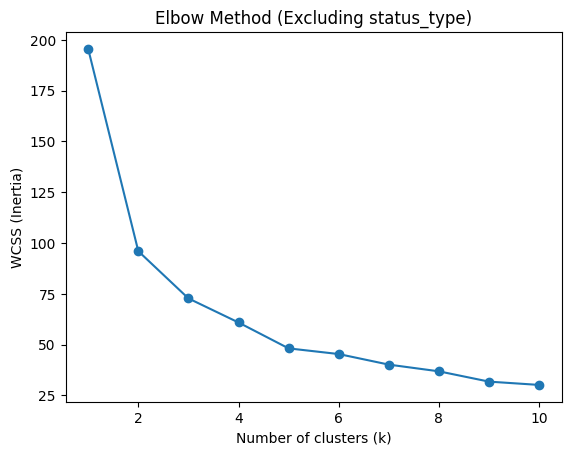


=== Correct Way (Excluding status_type) ===
Accuracy: 0.6002286040862981
Confusion Matrix:
 [[   5   49    9    0]
 [ 123 3967  154    0]
 [  27  262   70    0]
 [  44 2019  111  159]]

=== Wrong Way (Including status_type in training) ===
Accuracy: 1.0
Confusion Matrix:
 [[  63    0    0    0]
 [   0 4244    0    0]
 [   0    0  359    0]
 [   0    0    0 2333]]


In [10]:
# ==============================
# ✅ Correct Way (exclude status_type)
# ==============================
X = df.drop(columns=['status_type'])
y_true = df['status_type']

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (Excluding status_type)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

# Run KMeans with fixed k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

# Hungarian algorithm for best matching
conf_matrix = confusion_matrix(y_true, y_pred)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
mapping = {col: row for row, col in zip(row_ind, col_ind)}
y_mapped = np.array([mapping[label] for label in y_pred])

print("\n=== Correct Way (Excluding status_type) ===")
print("Accuracy:", accuracy_score(y_true, y_mapped))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_mapped))


# ==============================
# ❌ Wrong Way (include status_type as a feature)
# ==============================
X_wrong = df.copy()  # includes status_type in features!
y_true_wrong = df['status_type']

kmeans_wrong = KMeans(n_clusters=k, random_state=42)
y_pred_wrong = kmeans_wrong.fit_predict(X_wrong)

# Hungarian algorithm again
conf_matrix_wrong = confusion_matrix(y_true_wrong, y_pred_wrong)
row_ind, col_ind = linear_sum_assignment(-conf_matrix_wrong)
mapping_wrong = {col: row for row, col in zip(row_ind, col_ind)}
y_mapped_wrong = np.array([mapping_wrong[label] for label in y_pred_wrong])

print("\n=== Wrong Way (Including status_type in training) ===")
print("Accuracy:", accuracy_score(y_true_wrong, y_mapped_wrong))
print("Confusion Matrix:\n", confusion_matrix(y_true_wrong, y_mapped_wrong))


In [11]:
# ========== ✅ Correct Way (exclude status_type) ==========
X = df.drop(columns=['status_type'])
kmeans_correct = KMeans(n_clusters=4, random_state=42)
labels_correct = kmeans_correct.fit_predict(X)

fig1 = px.scatter_3d(
    df,
    x="num_reactions",
    y="num_comments",
    z="num_shares",
    color=labels_correct.astype(str),
    opacity=0.7,
    title="✅ Correct Way (Excluding status_type)"
)
fig1.update_layout(
    scene=dict(
        xaxis_title="Reactions",
        yaxis_title="Comments",
        zaxis_title="Shares"
    )
)


# ========== ❌ Wrong Way (include status_type) ==========
X_wrong = df.copy()   # includes status_type
kmeans_wrong = KMeans(n_clusters=4, random_state=42)
labels_wrong = kmeans_wrong.fit_predict(X_wrong)

fig2 = px.scatter_3d(
    df,
    x="num_reactions",
    y="num_comments",
    z="num_shares",
    color=labels_wrong.astype(str),
    opacity=0.7,
    title="❌ Wrong Way (Including status_type)"
)
fig2.update_layout(
    scene=dict(
        xaxis_title="Reactions",
        yaxis_title="Comments",
        zaxis_title="Shares"
    )
)

# Show both plots one after another
fig1.show()
fig2.show()

In [59]:
%pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.
